<a href="https://colab.research.google.com/github/Pancerro/MachineLearning/blob/master/lab7/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AND
Wagi i biesy:  [[0.8544429  1.50685064]] [[0.52333394]] [[0.]] [[0.]]


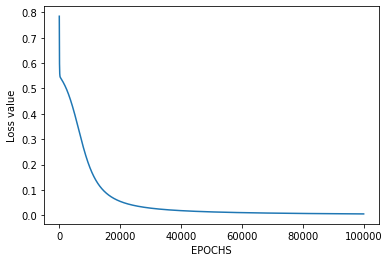

Input:  [[1 1 0 0]
 [0 1 0 1]]
Output:  [[0. 1. 0. 0.]]
OR
Wagi i biesy:  [[0.41531125 0.58338753]] [[0.75946264]] [[0.]] [[0.]]


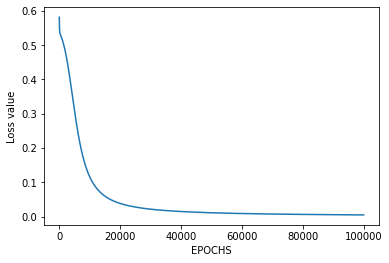

Input:  [[1 1 0 0]
 [0 1 0 1]]
Output:  [[1. 1. 0. 1.]]
NOT
-1 0.5
NOT(1) = 0
-1 0.5
NOT(0) = 1
XOR
Wagi i biesy:  [[0.41269018 1.16783683]] [[-1.21248978]] [[0.]] [[0.]]


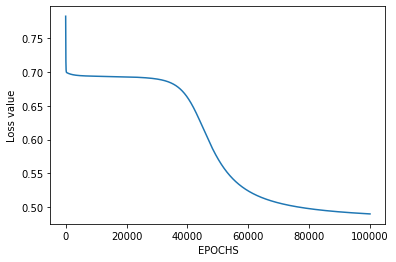

Input:  [[1 1 0 0]
 [0 1 0 1]]
Output:  [[1. 0. 0. 0.]]
XNOR
Wagi i biesy:  [[-2.15670526 -0.89866762]] [[-1.70673775]] [[0.]] [[0.]]


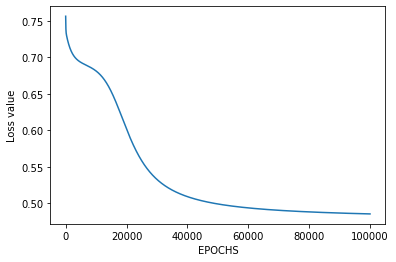

Input:  [[1 1 0 0]
 [0 1 0 1]]
Output:  [[1. 1. 1. 0.]]


In [51]:

import numpy as np 
from matplotlib import pyplot as plt 

# Sigmoid Function - funckja aktywacji
def sigmoid(z): 
	return 1 / (1 + np.exp(-z)) 

# Inicja parametrow sieci neutronowej
# Inicjacja wag
# Bias inicjacja =  0 
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures): 
	W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures) 
	W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers) 
	b1 = np.zeros((neuronsInHiddenLayers, 1)) 
	b2 = np.zeros((outputFeatures, 1)) 
	print("Wagi i biesy: ", W1,W2,b1,b2)
	parameters = {"W1" : W1, "b1": b1, 
				"W2" : W2, "b2": b2} 
	return parameters 

# Forward Propagation 
def forwardPropagation(X, Y, parameters): 
	m = X.shape[1] 
	W1 = parameters["W1"] 
	W2 = parameters["W2"] 
	b1 = parameters["b1"] 
	b2 = parameters["b2"] 

	Z1 = np.dot(W1, X) + b1 
	A1 = sigmoid(Z1) 
	Z2 = np.dot(W2, A1) + b2 
	A2 = sigmoid(Z2) 
    
	cache = (Z1, A1, W1, b1, Z2, A2, W2, b2) 
	logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y)) 
	cost = -np.sum(logprobs) / m 
	return cost, cache, A2 

# Backward Propagation 
def backwardPropagation(X, Y, cache): 
	m = X.shape[1] 
	(Z1, A1, W1, b1, Z2, A2, W2, b2) = cache 
	
	dZ2 = A2 - Y 
	dW2 = np.dot(dZ2, A1.T) / m 
	db2 = np.sum(dZ2, axis = 1, keepdims = True) 
	
	dA1 = np.dot(W2.T, dZ2) 
	dZ1 = np.multiply(dA1, A1 * (1- A1)) 
	dW1 = np.dot(dZ1, X.T) / m 
	db1 = np.sum(dZ1, axis = 1, keepdims = True) / m 
	
	gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, 
				"dZ1": dZ1, "dW1": dW1, "db1": db1} 
	return gradients 

# Nowe wartosci wag
def updateParameters(parameters, gradients, learningRate): 
	parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"] 
	parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"] 
	parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"] 
	parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"] 
	return parameters 

#  AND
print("AND")
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input 
Y = np.array([[0, 0, 0, 1]]) # AND output 

# Parametry modelu
neuronsInHiddenLayers = 1  
inputFeatures = X.shape[0]
outputFeatures = Y.shape[0] 
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures) 
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1)) 

for i in range(epoch): 
	losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters) 
	gradients = backwardPropagation(X, Y, cache) 
	parameters = updateParameters(parameters, gradients, learningRate) 

plt.figure() 
plt.plot(losses) 
plt.xlabel("EPOCHS") 
plt.ylabel("Loss value") 
plt.show() 

# Testing 
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input 
cost,_, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print("Input: ", X)
print("Output: ",prediction) 

#OR
print("OR")
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # OR input 
Y = np.array([[0, 1, 1, 1]]) # OR output 
  
# Parametry modelu
neuronsInHiddenLayers = 1  
inputFeatures = X.shape[0]  
outputFeatures = Y.shape[0]
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures) 
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1)) 
  
for i in range(epoch): 
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters) 
    gradients = backwardPropagation(X, Y, cache) 
    parameters = updateParameters(parameters, gradients, learningRate) 

plt.figure() 
plt.plot(losses) 
plt.xlabel("EPOCHS") 
plt.ylabel("Loss value") 
plt.show() 
  
# Testing 
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # OR input 
cost, _, A2 = forwardPropagation(X, Y, parameters) 
prediction = (A2 > 0.5) * 1.0
print("Input: ", X)
print("Output: ",prediction)
print("NOT")
def unitStep(v): 
    if v >= 0: 
        return 1
    else: 
        return 0
  
def perceptronModel(x, w, b): 
    v = np.dot(w, x) + b 
    y = unitStep(v) 
    return y 
  
# NOT Logic Function 
# w = -1, b = 0.5 
def NOT_logicFunction(x): 
    w = -1
    b = 0.5
    print(w,b)
    return perceptronModel(x, w, b) 
  
# testing the Perceptron Model 
test1 = np.array(1) 
test2 = np.array(0) 
 
print("NOT({}) = {}".format(1, NOT_logicFunction(test1))) 
print("NOT({}) = {}".format(0, NOT_logicFunction(test2))) 


# XOR 
print("XOR")
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input 
Y = np.array([[0, 1, 1, 0]]) # XOR output 
  
# Parametry modelu
neuronsInHiddenLayers = 1 
inputFeatures = X.shape[0] 
outputFeatures = Y.shape[0]  
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures) 
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1)) 
  
for i in range(epoch): 
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters) 
    gradients = backwardPropagation(X, Y, cache) 
    parameters = updateParameters(parameters, gradients, learningRate) 

plt.figure() 
plt.plot(losses) 
plt.xlabel("EPOCHS") 
plt.ylabel("Loss value") 
plt.show() 
  
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input 
cost, _, A2 = forwardPropagation(X, Y, parameters) 
prediction = (A2 > 0.5) * 1.0
print("Input: ", X)
print("Output: ",prediction)


# XNOR
print("XNOR")
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XNOR input 
Y = np.array([[1, 0, 0, 1]]) # XNOR output 
  
# Parametry Modelu 
neuronsInHiddenLayers = 1
inputFeatures = X.shape[0]
outputFeatures = Y.shape[0]
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures) 
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1)) 
  
for i in range(epoch): 
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters) 
    gradients = backwardPropagation(X, Y, cache) 
    parameters = updateParameters(parameters, gradients, learningRate) 
  
plt.figure() 
plt.plot(losses) 
plt.xlabel("EPOCHS") 
plt.ylabel("Loss value") 
plt.show() 
  
# Testing 
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XNOR input 
cost, _, A2 = forwardPropagation(X, Y, parameters) 
prediction = (A2 > 0.5) * 1.0
print("Input: ", X)
print("Output: ",prediction) 